The test dataset contains four cloud detection categories:

| category           | count | relative |
| ------------------ | ----- | -------- |
| undefined          |     4 | 28.6%    |
| cloud_free         |     2 | 14.3%    |
| probably_cloudy    |     3 | 21.4%    |
| most_likely_cloudy |     5 | 35.7%    |

Note that the relative counts don't correspond to cloud fractions as the undefined values should not be taken into account for the computation of cloud fractions.

The true cloud fractions are:
* `probably_cloudy`: 30%
* `most_likely_cloudy`: 50%
* total (any of the two): 80%

In [1]:
library(ncdf4)

In [2]:
nc <- nc_open("test_cloud_flag_fill.nc")

In [3]:
cloud_flag <- ncvar_get(nc,"cloud_flag")
cloud_flag

[1] NA  0  1  2  1  2  0  1  2  2 NA NA NA  2

In [4]:
typeof(cloud_flag)

[1] "integer"

This is nice, `cloud_flag` is decoded as `integer`, but `NA` values are preseved. In R, (almost?) every value can be `NA` in addition to a value of its type.

# Mean cloudiness
This one is obviously wrong as the flag is not intended to be used as a numeric value:

In [5]:
mean(cloud_flag)

[1] NA

As in Julia, this does not work, but we are warned :-) Let's change that:

In [6]:
mean(cloud_flag, na.rm=TRUE)

[1] 1.3

... still wrong, but we knew that.

Let's have a look at the meanings:

In [7]:
meanings <- ncatt_get(nc, "cloud_flag", "flag_values")$value
names(meanings) <- unlist(strsplit(ncatt_get(nc, "cloud_flag", "flag_meanings")$value, " "))
meanings

cloud_free    probably_cloudy most_likely_cloudy 
                 0                  1                  2

Perfect, there are three valid classes. Let's check the cloud fraction:

In [8]:
mean(cloud_flag == meanings["most_likely_cloudy"], na.rm=TRUE)

[1] 0.5

This is nice! Exactly the right number.

# how does the data look without thinking about it?

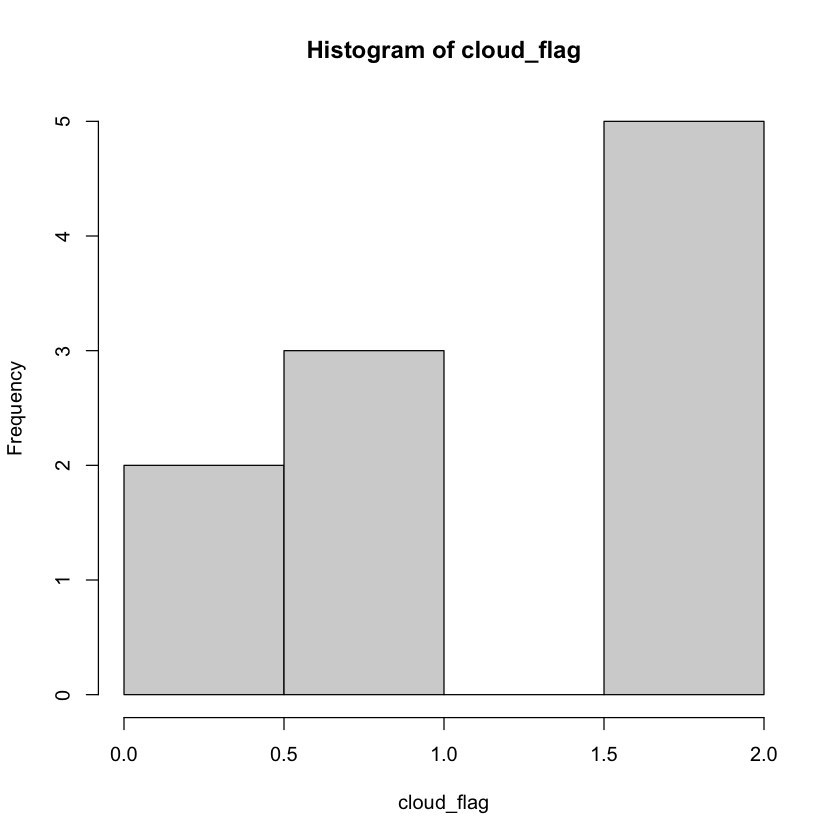

In [9]:
hist(cloud_flag)